In [81]:
import torch
import matplotlib.pyplot as plt
from matplotlib import colors

In [44]:
class Node:
    def __init__(self,data,next_node=None):
        self.data = data
        self.next = next_node

In [45]:
class Stack:
    def __init__(self):
        self.top = None
    def is_empty(self):
        return self.top is None
    def push(self,data):
        new = Node(data,self.top)
        self.top = new
    def pop(self):
        data = self.top.data
        self.top = self.top.next
        return data


In [86]:
class maze:
    def __init__(self,maze=[],start=[],end=[]):
        self.maze_map = maze
        self.start = tuple(start)
        self.end = tuple(end)#吃了大亏:如果不tuple化, python不会认为[0,0] = (0,0),导致了严重错误!
        self.row = len(maze)
        self.col = len(maze[0])
    def printmaze(self): #打印迷宫
        for row in self.maze_map:
            output = ""
            for col in row:
                if col == 0:
                    output += "O"#通路是O,障碍是#,方便观察迷宫
                else:
                    output += "#"
            print(output)
    def find_all_path(self):

        stack = Stack()#上面的类实现的Stack
        stack.push((self.start,[self.start]))#data必须记录:现在的位置,以及怎么过来的
        all_paths = []

        while not stack.is_empty(): #DFS搜索
            current_pos, path = stack.pop()
            
            if current_pos == self.end:
                all_paths.append(path)
                continue #如果到了终点,那么就先加入这个path,然后再停止!

            for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]: #走出一步的操作,
                x, y = current_pos[0] + dx, current_pos[1] + dy
                
                if 0 <= x < self.row and 0 <= y < self.col:
                    if self.maze_map[x][y] == 0 and (x,y) not in path:#not in path避免回路的出现
                        new_path = path + [(x,y)]
                        stack.push(((x,y), new_path))#压入栈中
                        #print(f"当前压入栈中的是:{x},{y}")
                        #print(f"路径:{new_path}")
        
        return all_paths

    def visualize(self, path):
        # 创建显示矩阵
        maze_display = []
        for i in range(self.row):
            row = []
            for j in range(self.col):
                if (i,j) == self.start:
                    row.append(2)
                elif (i,j) == self.end:
                    row.append(3)
                else:
                    row.append(0 if self.maze_map[i][j] == 0 else 1)
            maze_display.append(row)
        
        # 设置颜色映射
        cmap = colors.ListedColormap(['white', 'black', 'green', 'red'])
        norm = colors.BoundaryNorm([0,1,2,3], cmap.N)

        plt.figure(figsize=(8, 8))
        plt.imshow(maze_display, cmap=cmap, norm=norm, interpolation='none')

        # 绘制路径
        if path:
            y_centers = [p[1]+0.5-0.25 for p in path]
            x_centers = [p[0]+0.5-0.25 for p in path]
            plt.plot(y_centers, x_centers, color='blue', linewidth=3, marker='o', 
                     markersize=8, linestyle='-', markerfacecolor='yellow')

        # 设置网格
        plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)
        plt.xticks(range(self.col), [])
        plt.yticks(range(self.row), [])
        plt.gca().set_xticks([x - 0.5 for x in range(self.col)], minor=True)
        plt.gca().set_yticks([y - 0.5 for y in range(self.row)], minor=True)
        plt.gca().tick_params(which='minor', length=0)
        plt.show()

    def solve(self):
        all_paths = self.find_all_path()
        if not all_paths: #not会自动检测是不是空
            print("没有通路")
            return False
        sorted_paths = sorted(all_paths, key=len)#python内部的sorted函数,将len()作为排序的准则
        print("所有可能路径：")
        for i, path in enumerate(sorted_paths):
            print(f"路径{i+1}: {'→'.join(f'({x},{y})' for x,y in path)}")
        
        print("\n最短路径：", '→'.join(f'({x},{y})' for x,y in sorted_paths[0]))
        self.visualize(sorted_paths[0])
        return True
    

#OOO#
#O#O#
#OOO#
#O#O#
#OOO#
###O#
所有可能路径：
路径1: (0,1)→(0,2)→(0,3)→(1,3)→(2,3)→(3,3)→(4,3)→(5,3)
路径2: (0,1)→(1,1)→(2,1)→(2,2)→(2,3)→(3,3)→(4,3)→(5,3)
路径3: (0,1)→(1,1)→(2,1)→(3,1)→(4,1)→(4,2)→(4,3)→(5,3)
路径4: (0,1)→(0,2)→(0,3)→(1,3)→(2,3)→(2,2)→(2,1)→(3,1)→(4,1)→(4,2)→(4,3)→(5,3)

最短路径： (0,1)→(0,2)→(0,3)→(1,3)→(2,3)→(3,3)→(4,3)→(5,3)


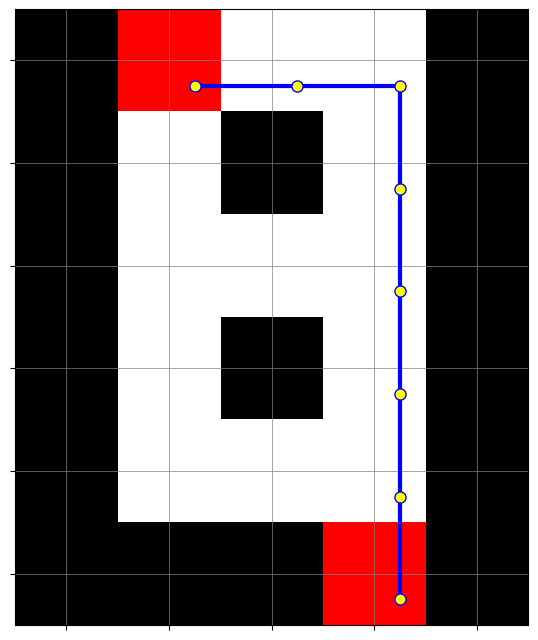

True

In [89]:
maz = [
    [1,0,0,0,1],
    [1,0,1,0,1],
    [1,0,0,0,1],
    [1,0,1,0,1],
    [1,0,0,0,1],
    [1,1,1,0,1]
]

m = maze(maz, start=[0,1], end=[5,3])
m.printmaze()
m.solve()